# Project Cancer Detection

# Breast Cancer Wisconsin (Diagnostic) Data Set

[Source: UCI](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

[Data Set info](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [306]:
col = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 
       'Uniformity of Cell Shape', 'Marginal Adhesion', 
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
df = pd.read_csv("breast-cancer-wisconsin.data.csv", names=col,
                 header=None)
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data Pre-processing

In [307]:
np.where(df.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [308]:
# All columns have the same number of non-null counts. 
# That means there are no empty data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [309]:
# There are 10 unique values for the column "Bare Nuclei", 
# where only 10 were supposed to be:
df['Bare Nuclei'].describe()

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [310]:
# The extra unique value is the symbol "?":
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [311]:
# What to do with these wrong registers? 
# Let us see first how many are they.
# There are 16 registers with no information on the column  "Bare Nuclei"
df[df['Bare Nuclei'] == "?"]

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [0]:
# As there are almost 700 registers, we can afford to lose 16:
df['Bare Nuclei'].replace("?", np.NAN, inplace=True)
df = df.dropna()

In [0]:
# Back to normal:
df['Bare Nuclei'].value_counts()

Note that for class: 2 is benign, 4 is for malignant

$$\frac{\text{df["Class"]}}{2} - 1$$

In [0]:
df['Class'] = df['Class'] / 2 - 1

In [316]:
df['Class'].value_counts()

0.0    444
1.0    239
Name: Class, dtype: int64

In [317]:
df.columns

Index(['id', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           683 non-null    int64  
 1   Clump Thickness              683 non-null    int64  
 2   Uniformity of Cell Size      683 non-null    int64  
 3   Uniformity of Cell Shape     683 non-null    int64  
 4   Marginal Adhesion            683 non-null    int64  
 5   Single Epithelial Cell Size  683 non-null    int64  
 6   Bare Nuclei                  683 non-null    object 
 7   Bland Chromatin              683 non-null    int64  
 8   Normal Nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  Class                        683 non-null    float64
dtypes: float64(1), int64(9), object(1)
memory usage: 64.0+ KB


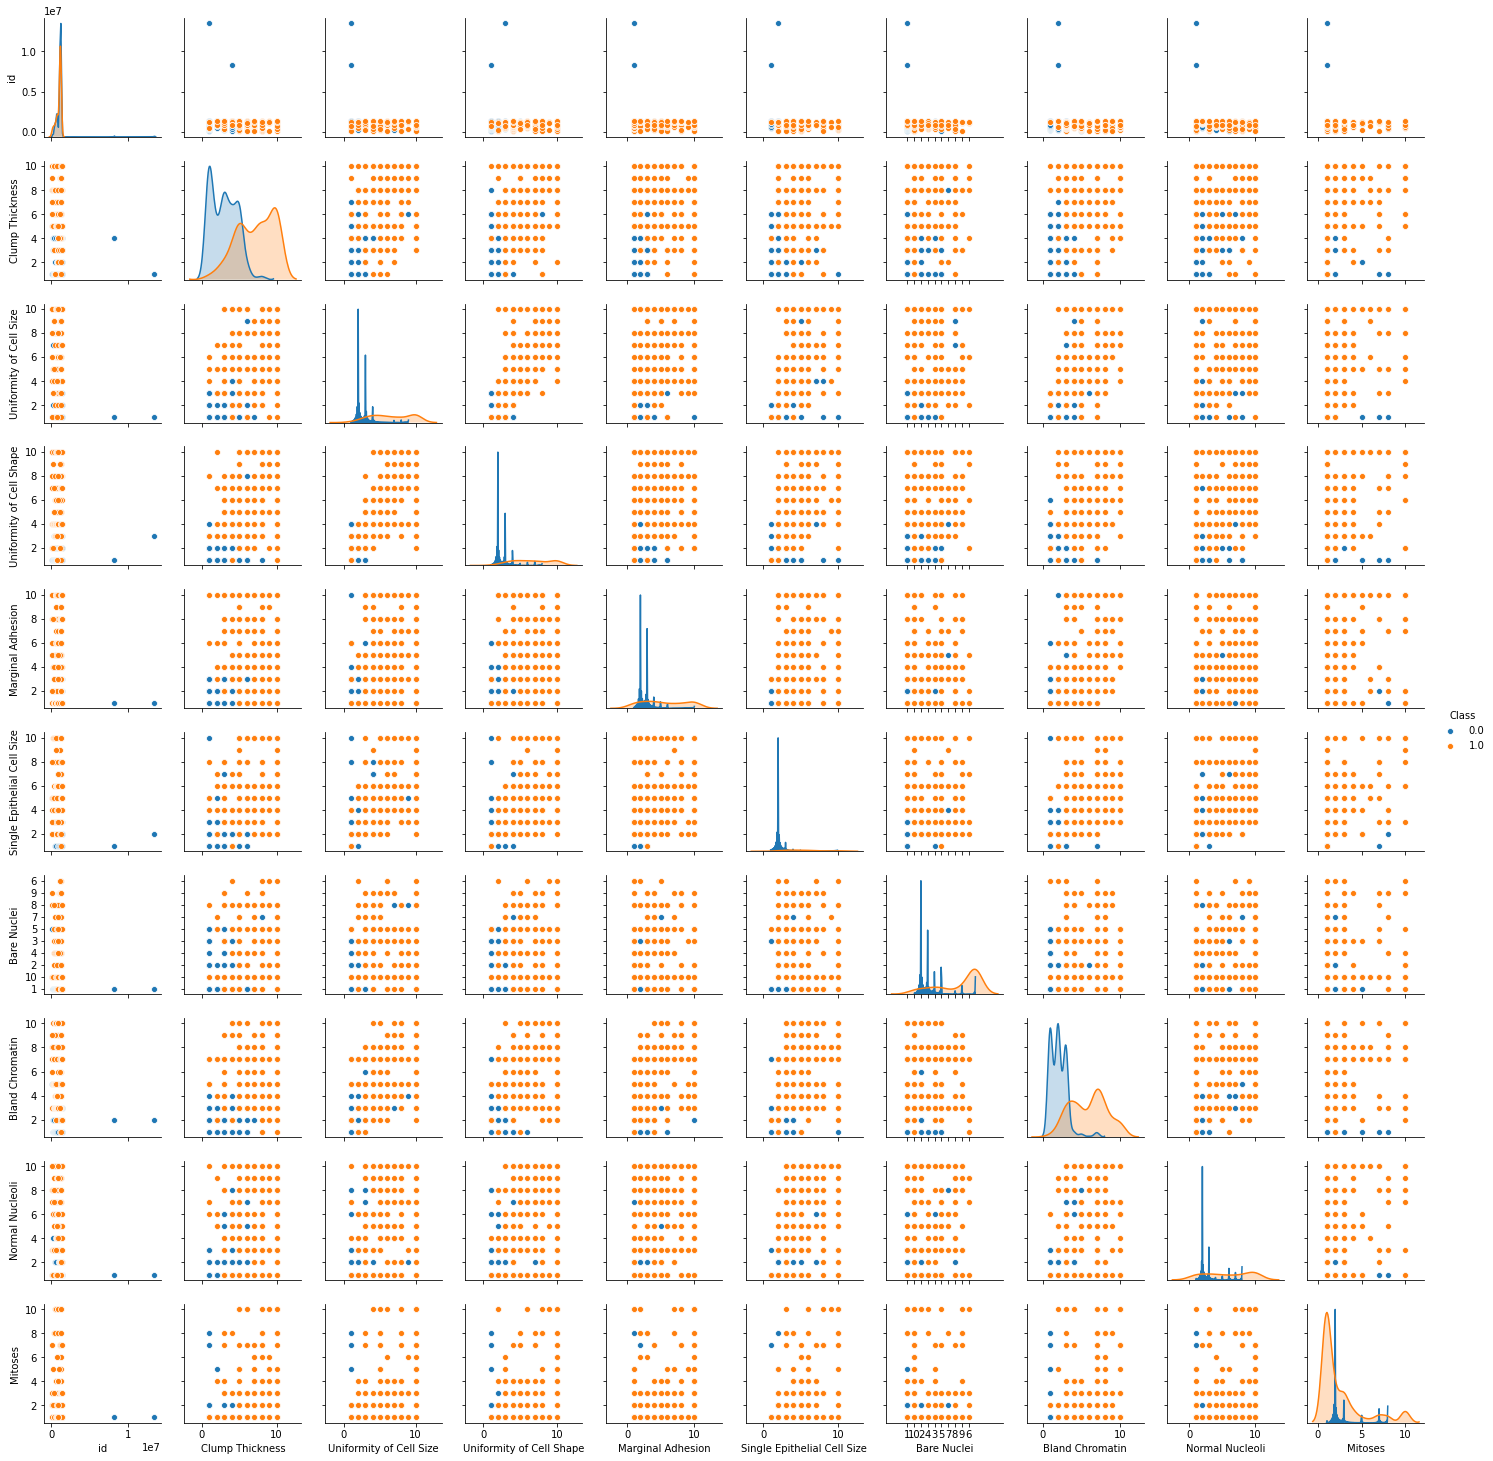

In [319]:
sns.pairplot(df, hue="Class", height=2)

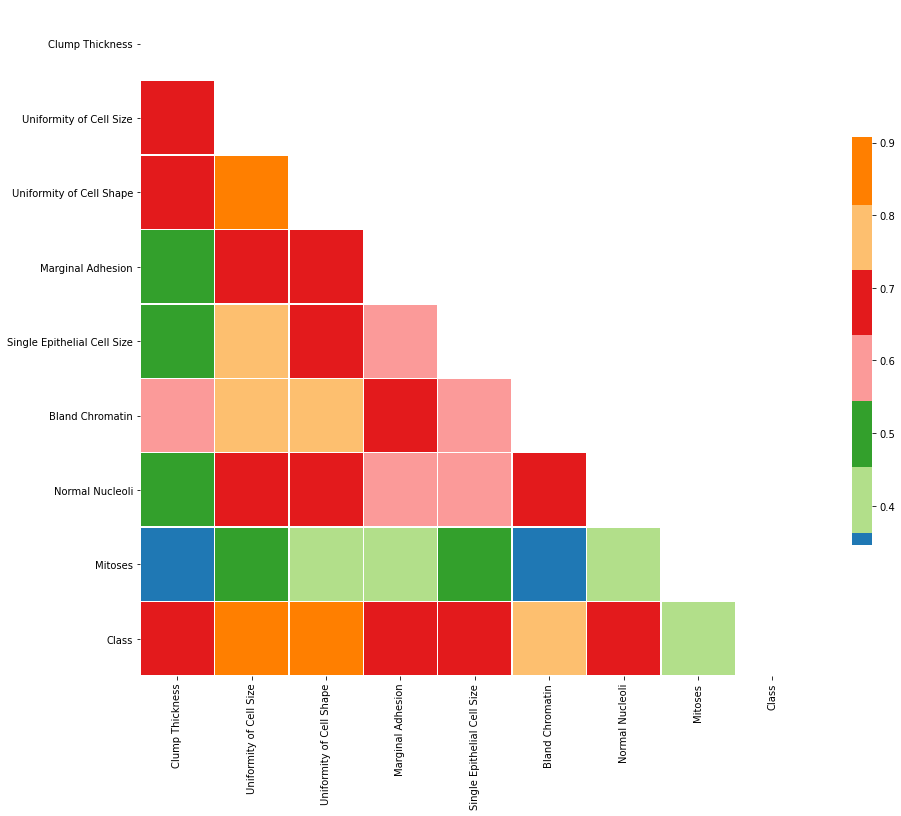

In [320]:
# Correlation analysis:
corr = df.drop(['id'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(15, 15))
#cmap = sns.color_palette("coolwarm", n_colors=10)
cmap = sns.color_palette("Paired", n_colors=20)
ax = sns.heatmap(corr  , mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Feature selection.**

The features **Uniformity of Cell Size** and **Uniformity of Cell Shape** are the most correlated. And both of them are very correlated with the **Class**. We should definitely select at least one of them for our model. One can say as a first approximation that the *uniformity* of the cells give already a lot of information about the cells being cancerous. 

The next mot correlated features with class is **Bland Chromtism**, and then:

- Clump Thickness

- Marginal Adhesion

- Normal Nucleoli

In this case we will not perform any feature selection, as results are already pretty good if we just include all the features in the models. 

In [0]:
# All features are selected except for id and class (class is actually the target).
# The 16 registers without data for Bare Nuclei were removed. 
X = df.drop(['id', 'Class'], axis=1)
X_col = X.columns

# Scale features:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X.values)

y = df['Class']



Training

In [0]:
from sklearn.model_selection import train_test_split

In [323]:
df1 = pd.DataFrame(X, columns=X_col)
df1.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [0]:
X_train, X_test, y_train, y_test = train_test_split(df1, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [325]:
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(MinMaxScaler().fit_transform(df.drop(['id', 'Class'], axis=1).values), columns=X_col).head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


# KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')

In [328]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

In [0]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        acc = accuracy_score(y_train, clf.predict(X_train))
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(acc))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

        return [acc, res.mean(), res.std()]
        
    elif train==False:
        acc = accuracy_score(y_test, clf.predict(X_test))
        recall = recall_score(y_test, clf.predict(X_test))
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(acc))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

        return [acc, recall]

In [331]:
res = print_score(knn, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9725

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       365
         1.0       0.96      0.96      0.96       181

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546


Confusion Matrix: 
 [[358   7]
 [  8 173]]

Average Accuracy: 	 0.9634
Accuracy SD: 		 0.0200


In [332]:
res_valid = print_score(knn, X_train, y_train, X_test, y_test, train=False)
results = []
res = res + res_valid
res.insert(0,'kNN')
results.append(res)

Test Result:

accuracy score: 0.9562

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        79
         1.0       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix: 
 [[78  1]
 [ 5 53]]



# KNN + Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV

In [334]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [0]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [0]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),
                              params, 
                              n_jobs=-1,
                              verbose=1)

In [337]:
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [338]:
grid_search_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [339]:
res = print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Result:

accuracy score: 0.9707

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       365
         1.0       0.96      0.95      0.96       181

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546


Confusion Matrix: 
 [[358   7]
 [  9 172]]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Average Accuracy: 	 0.9634
Accuracy SD: 		 0.0231


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


In [340]:
res_valid = print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9489

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        79
         1.0       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137


Confusion Matrix: 
 [[78  1]
 [ 6 52]]



In [0]:
res = res + res_valid
res.insert(0,'kNN + grid search')
results.append(res)

In [342]:
grid_search_cv.best_params_

{'n_neighbors': 8}

In [0]:
#grid_search_cv.cv_results_['mean_train_score']

In [344]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.00554266, 0.00511627, 0.00713534, 0.00523543, 0.00528889,
        0.00388894, 0.00368295, 0.00397649, 0.00456085, 0.00387316]),
 'mean_score_time': array([0.02276316, 0.01060877, 0.01123595, 0.01343946, 0.01065288,
        0.01111851, 0.01068316, 0.01060486, 0.01092992, 0.01119189]),
 'mean_test_score': array([0.95241034, 0.94687239, 0.96155129, 0.96338616, 0.95971643,
        0.96155129, 0.96520434, 0.96522102, 0.96520434, 0.96520434]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8},
  {'n_neighbors': 9},
  {'n_neighbors': 10}],
 'rank_test_score': array([ 9, 10,  7,  5,  8,  6,  2,  1,  2, 

# SVM, Random Forest, XGBoost

In [345]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
res = print_score(clf, X_train, y_train, X_test, y_test, train=True)
res_valid = print_score(clf, X_train, y_train, X_test, y_test, train=False)
res = res + res_valid
res.insert(0,'SVM')
results.append(res)

Train Result:

accuracy score: 0.9799

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       365
         1.0       0.96      0.98      0.97       181

    accuracy                           0.98       546
   macro avg       0.98      0.98      0.98       546
weighted avg       0.98      0.98      0.98       546


Confusion Matrix: 
 [[358   7]
 [  4 177]]

Average Accuracy: 	 0.9634
Accuracy SD: 		 0.0244
Test Result:

accuracy score: 0.9635

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        79
         1.0       0.96      0.95      0.96        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix: 
 [[77  2]
 [ 3 55]]



In [346]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
res = print_score(clf, X_train, y_train, X_test, y_test, train=True)
res_valid = print_score(clf, X_train, y_train, X_test, y_test, train=False)
res = res + res_valid
res.insert(0,'Random forest')
results.append(res)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       365
         1.0       1.00      1.00      1.00       181

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546


Confusion Matrix: 
 [[365   0]
 [  0 181]]

Average Accuracy: 	 0.9652
Accuracy SD: 		 0.0223
Test Result:

accuracy score: 0.9489

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        79
         1.0       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137


Confusion Matrix: 
 [[78  1]
 [ 6 52]]



In [347]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
res = print_score(clf, X_train, y_train, X_test, y_test, train=True)
res_valid = print_score(clf, X_train, y_train, X_test, y_test, train=False)
res = res + res_valid
res.insert(0,'xGBoost')
results.append(res)

Train Result:

accuracy score: 0.9927

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       365
         1.0       0.98      0.99      0.99       181

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546


Confusion Matrix: 
 [[362   3]
 [  1 180]]

Average Accuracy: 	 0.9598
Accuracy SD: 		 0.0213
Test Result:

accuracy score: 0.9489

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        79
         1.0       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137


Confusion Matrix: 
 [[78  1]
 [ 6 52]]



# Print results

***

In [349]:
df_results = pd.DataFrame.from_records(results)
df_results.columns = ['Classifier', 'Train accuracy score', 'Mean accuracy score', 'Standard deviation', 'Test accuracy score', 'Test recall score']
df_results.head(10)

,Classifier,Train accuracy score,Mean accuracy score,Standard deviation,Test accuracy score,Test recall score
0,kNN,0.972527,0.963434,0.019982,0.956204,0.913793
1,kNN + grid search,0.970696,0.963401,0.023081,0.948905,0.896552
2,SVM,0.979853,0.963434,0.024446,0.963504,0.948276
3,Random forest,1.000000,0.965219,0.022299,0.948905,0.896552
4,xGBoost,0.992674,0.959764,0.021311,0.948905,0.896552


**Performance metrics**

In this case we are probably not interested in the accuracy of the model, but rather on the recall. 

We want **high accuracy** on a model when we want to **minimize the false positives**. If we want to detect spam mail, what I don't want is for a perfectly fine email to end up in the spam folder (false positive), even though that implies that some spam mails might end up in the inbox. 

We want **high recall** when we want to **minimize the false negatives**, in the case of cancer the worst mistake would be to misdiagnose a person with cancer. 

Therefore SVM seems to be the best model here, which yields a recall score of 95%. However, this means that about 5 out of 100 people with cancer will be misdiagnosed. Clearly this percentage is not satisfactory for a real life application. 